<a href="https://colab.research.google.com/github/racheljhuh/EDA/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/DS3001/group3.git

Cloning into 'group3'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 143 (delta 61), reused 105 (delta 36), pack-reused 3
Receiving objects: 100% (143/143), 1.17 MiB | 2.88 MiB/s, done.
Resolving deltas: 100% (61/61), done.


**Summary**


**Data**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_train = pd.read_csv('./group3/project_2/data/training_data.csv')
df_test = pd.read_csv('./group3/project_2/data/testing_data.csv')
df_train = df_train.drop(['ever_married', 'id', 'Unnamed: 0'], axis=1)
df_test = df_test.drop(['ever_married', 'id', 'Unnamed: 0'], axis=1)


y_train = df_train['stroke']
X_train = df_train.drop('stroke',axis=1)
y_test = df_test['stroke']
X_test = df_test.drop('stroke',axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4087 non-null   object 
 1   age                4087 non-null   float64
 2   hypertension       4087 non-null   int64  
 3   heart_disease      4087 non-null   int64  
 4   work_type          4087 non-null   object 
 5   Residence_type     4087 non-null   object 
 6   avg_glucose_level  4087 non-null   float64
 7   bmi                3928 non-null   float64
 8   smoking_status     4087 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 287.5+ KB


In [ ]:
X_train.head()


,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,36.0,0,0,Govt_job,Urban,65.87,32.2,formerly smoked
1,Female,45.0,0,0,Govt_job,Rural,68.66,25.3,never smoked
2,Male,58.0,0,0,Self-employed,Rural,170.93,30.7,Unknown
3,Female,61.0,0,0,Self-employed,Urban,69.88,27.1,never smoked
4,Female,78.0,0,0,Private,Urban,103.86,30.6,Unknown


In [ ]:
X_train['bmi'].info()
#There are about 150 nans in bmi, to deal with these, we replaced the nan's with the average for BMI

<class 'pandas.core.series.Series'>
RangeIndex: 4087 entries, 0 to 4086
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
3928 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB


In [ ]:
X_train['bmi'] = X_train['bmi'].fillna(X_train['bmi'].mean())
X_test['bmi'] = X_test['bmi'].fillna(X_test['bmi'].mean())
X_train['bmi'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4087 entries, 0 to 4086
Series name: bmi
Non-Null Count  Dtype  
--------------  -----  
4087 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB


<Axes: >

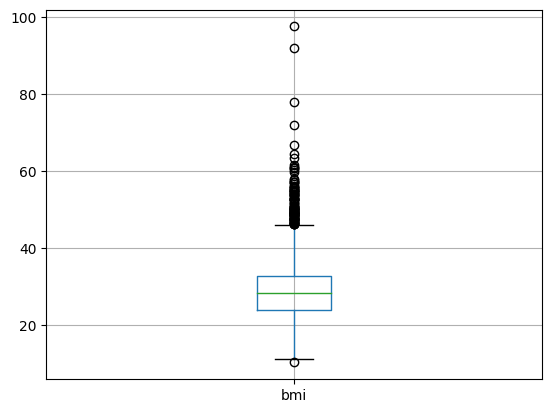

In [ ]:
X_train.boxplot(column='bmi')
#While there is a lot of outliers, these are all valid BMI's to have, so we left them in because
#a high BMI might be very telling of a stroke.

<Axes: >

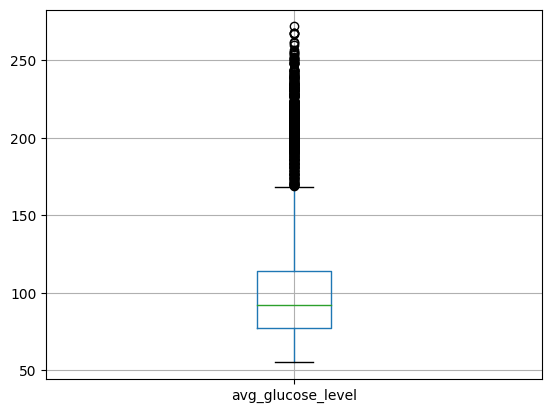

In [ ]:
X_train.boxplot(column='avg_glucose_level')
#We realize there are outliers, but because there are so many, we thought that any form of cleaning would be
#too drastic of a change to the dataset.

In [ ]:
X_train['avg_glucose_level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4087 entries, 0 to 4086
Series name: avg_glucose_level
Non-Null Count  Dtype  
--------------  -----  
4087 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB


In [ ]:
X_test['avg_glucose_level'].info()
#This shows there are no nans to clean up.

<class 'pandas.core.series.Series'>
RangeIndex: 1023 entries, 0 to 1022
Series name: avg_glucose_level
Non-Null Count  Dtype  
--------------  -----  
1023 non-null   float64
dtypes: float64(1)
memory usage: 8.1 KB


<Axes: >

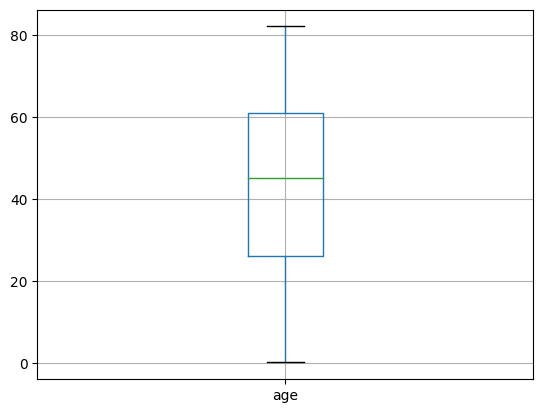

In [ ]:
X_train.boxplot(column='age')
#The age variable, unsurprisingly, doesn't have any outliers.

In [ ]:
X_train['avg_glucose_level'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4087 entries, 0 to 4086
Series name: avg_glucose_level
Non-Null Count  Dtype  
--------------  -----  
4087 non-null   float64
dtypes: float64(1)
memory usage: 32.1 KB


In [ ]:
X_test['avg_glucose_level'].info()
#There are no nan's to clean up in age.

<class 'pandas.core.series.Series'>
RangeIndex: 1023 entries, 0 to 1022
Series name: avg_glucose_level
Non-Null Count  Dtype  
--------------  -----  
1023 non-null   float64
dtypes: float64(1)
memory usage: 8.1 KB


In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4087 entries, 0 to 4086
Series name: stroke
Non-Null Count  Dtype
--------------  -----
4087 non-null   int64
dtypes: int64(1)
memory usage: 32.1 KB


In [ ]:
y_test.info()
#There are no nans in the stroke variable to clean up.

<class 'pandas.core.series.Series'>
RangeIndex: 1023 entries, 0 to 1022
Series name: stroke
Non-Null Count  Dtype
--------------  -----
1023 non-null   int64
dtypes: int64(1)
memory usage: 8.1 KB


In [ ]:
X_train['smoking_status'].value_counts()

never smoked       1505
Unknown            1241
formerly smoked     699
smokes              642
Name: smoking_status, dtype: int64

In [ ]:
X_train.loc[X_train['smoking_status']=='Unknown','smoking_status'] = 'never smoked'
X_train.loc[X_train['smoking_status']=='formerly smoked','smoking_status'] = 'smokes'
X_train['smoking_status'].value_counts()
#to clean up the smoking variable, we essentially turned it into a binary being you gave either never smoked, or you
#have smoked. We did this by combining the formerly smoked category with the smokes category, and the the unknown
#with the never smoked category. This created the two categories you see below.

never smoked    2746
smokes          1341
Name: smoking_status, dtype: int64

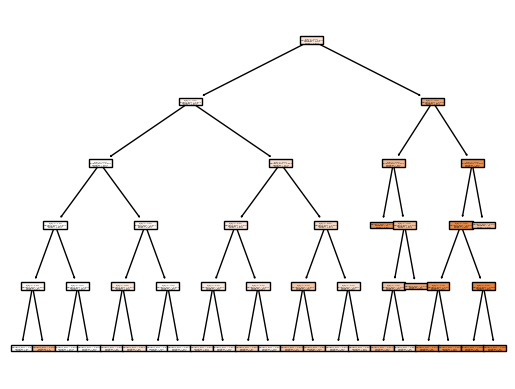

R-squared (R2): 0.06300373501753886
Root Mean Squared Error (RMSE): 0.20870589613090598


In [ ]:
#Tree Model
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

X_train = X_train.loc[:,['age'] ]
X_test = X_test.loc[:,['age'] ]

y_train = df_train['stroke']

model = tree.DecisionTreeRegressor(max_depth=5)
cart = model.fit(X_train, y_train)

# Plot the tree
tree.plot_tree(cart, filled=True)
plt.show()

# Make predictions on the test set
y_pred = cart.predict(X_test)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)



Optimal k for Test Set: [23]
Optimal k for Training Set: [1]


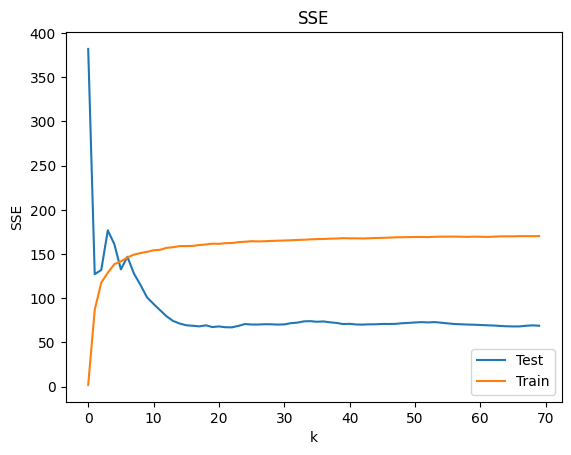

In [22]:
## KNN with age and avg glucose level
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as kNNRegression # Import the kNN regression tool
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X_train = X_train.loc[:,['age', 'avg_glucose_level']]
X_test = X_test.loc[:,['age', 'avg_glucose_level']]

# Apply maxmin to each column of X to get U:
X_train = X_train.apply(maxmin)

y_train = df_train['stroke']

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min_test = np.min(SSE_test)  # Lowest recorded SSE for the test set
min_index_test = np.where(SSE_test == SSE_min_test)  # Find the indices of y that equal the minimum
k_star_test = k_grid[min_index_test]  # Find the optimal value of k for the test set

SSE_min_train = np.min(SSE_train)  # Lowest recorded SSE for the training set
min_index_train = np.where(SSE_train == SSE_min_train)  # Find the indices of y that equal the minimum
k_star_train = k_grid[min_index_train]  # Find the optimal value of k for the training set

print("Optimal k for Test Set: {}".format(k_star_test))
print("Optimal k for Training Set: {}".format(k_star_train))

plt.plot(np.arange(0, k_bar), SSE_test, label='Test')  # Plot SSE by k for the test set
plt.plot(np.arange(0, k_bar), SSE_train, label='Train')  # Plot SSE by k for the training set
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

R²: 0.14151697023160237


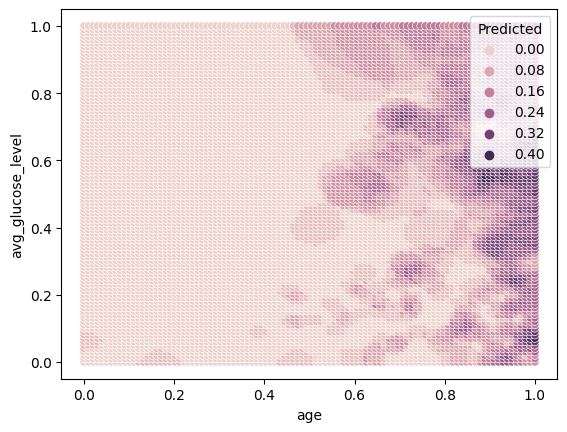

In [23]:


k = 23
model = kNNRegression(n_neighbors=k)
fitted_model = model.fit(X_train, y_train)

N_x = 100
N_y = 100
total = N_x * N_y

grid_x = np.linspace(0, 1, N_x)
grid_y = np.linspace(0, 1, N_y)

xs, ys = np.meshgrid(grid_x, grid_y)
X = xs.reshape(total)
Y = ys.reshape(total)

x_hat = pd.DataFrame({'age': X, 'avg_glucose_level': Y})
y_hat = fitted_model.predict(x_hat)
x_hat['Predicted'] = y_hat

# Calculate R²
r2 = r2_score(y_train, fitted_model.predict(X_train))
print(f'R²: {r2}')

this_plot = sns.scatterplot(data=x_hat, x='age', y='avg_glucose_level', hue = 'Predicted')



Optimal k based on Cross-Validation: 6


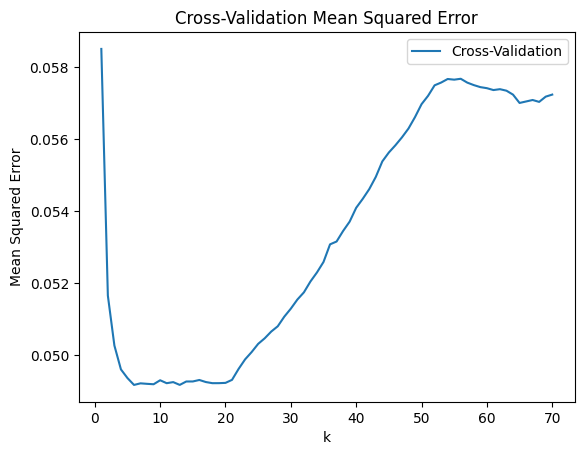

In [29]:
## KNN with just age
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as kNNRegression # Import the kNN regression tool
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X_train = X_train.loc[:,['age']]
X_test = X_test.loc[:,['age']]

# Apply maxmin to each column of X to get U:
X_train = X_train.apply(maxmin)

y_train = df_train['stroke']

k_values = np.arange(1, k_bar + 1)
mse_scores = []

for k in k_values:
    model = kNNRegression(n_neighbors=k)
    scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores.append(scores.mean())

# Find the optimal k based on the lowest mean squared error
optimal_k = k_values[np.argmin(mse_scores)]

print("Optimal k based on Cross-Validation: {}".format(optimal_k))

# Plot mean squared error by k
plt.plot(k_values, mse_scores, label='Cross-Validation')
plt.xlabel("k")
plt.ylabel("Mean Squared Error")
plt.legend(loc='upper right')
plt.title('Cross-Validation Mean Squared Error')
plt.show()

R²: -0.050742933632497156


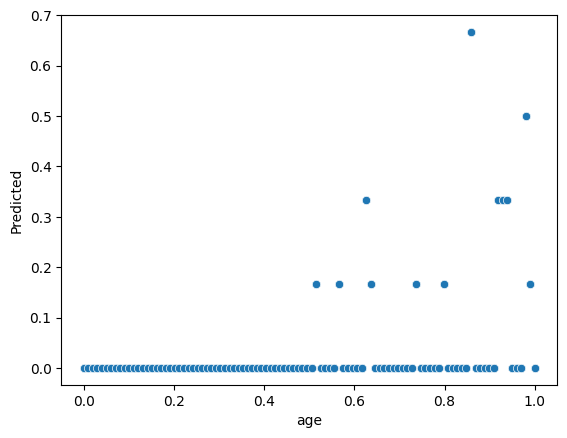

In [30]:
k = 6
model = kNNRegression(n_neighbors=k)
fitted_model = model.fit(X_train, y_train)

N_x = 100
N_y = 100
total = N_x * N_y

grid_x = np.linspace(0, 1, N_x)
grid_y = np.linspace(0, 1, N_y)

xs, ys = np.meshgrid(grid_x, grid_y)
X = xs.reshape(total)
Y = ys.reshape(total)

x_hat = pd.DataFrame({'age': X})
y_hat = fitted_model.predict(x_hat)
x_hat['Predicted'] = y_hat

# Calculate R²
r2 = r2_score(y_train, fitted_model.predict(X_train))
print(f'R²: {r2}')

this_plot = sns.scatterplot(data=x_hat, x='age', y='Predicted')


Optimal k for Test Set: [62]
Optimal k for Training Set: [66]


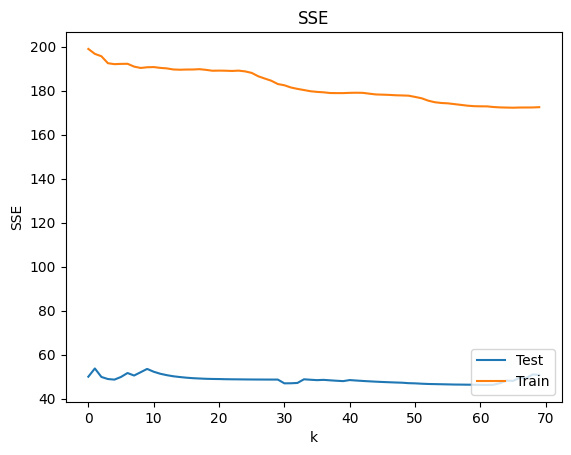

In [32]:
## KNN with age and heart disease
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor as kNNRegression # Import the kNN regression tool
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans

# Maxmin normalization function:
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)

X_train = X_train.loc[:,['age', 'heart_disease']]
X_test = X_test.loc[:,['age', 'heart_disease']]

# Apply maxmin to each column of X to get U:
X_train = X_train.apply(maxmin)

y_train = df_train['stroke']

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegression(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min_test = np.min(SSE_test)  # Lowest recorded SSE for the test set
min_index_test = np.where(SSE_test == SSE_min_test)  # Find the indices of y that equal the minimum
k_star_test = k_grid[min_index_test]  # Find the optimal value of k for the test set

SSE_min_train = np.min(SSE_train)  # Lowest recorded SSE for the training set
min_index_train = np.where(SSE_train == SSE_min_train)  # Find the indices of y that equal the minimum
k_star_train = k_grid[min_index_train]  # Find the optimal value of k for the training set

print("Optimal k for Test Set: {}".format(k_star_test))
print("Optimal k for Training Set: {}".format(k_star_train))

plt.plot(np.arange(0, k_bar), SSE_test, label='Test')  # Plot SSE by k for the test set
plt.plot(np.arange(0, k_bar), SSE_train, label='Train')  # Plot SSE by k for the training set
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

R²: 0.08676751509331271


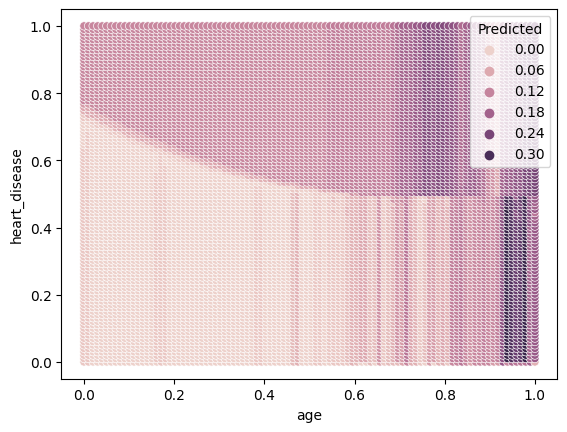

In [33]:
k = 62
model = kNNRegression(n_neighbors=k)
fitted_model = model.fit(X_train, y_train)

N_x = 100
N_y = 100
total = N_x * N_y

grid_x = np.linspace(0, 1, N_x)
grid_y = np.linspace(0, 1, N_y)

xs, ys = np.meshgrid(grid_x, grid_y)
X = xs.reshape(total)
Y = ys.reshape(total)

x_hat = pd.DataFrame({'age': X, 'heart_disease': Y})
y_hat = fitted_model.predict(x_hat)
x_hat['Predicted'] = y_hat

# Calculate R²
r2 = r2_score(y_train, fitted_model.predict(X_train))
print(f'R²: {r2}')

this_plot = sns.scatterplot(data=x_hat, x='age', y='heart_disease', hue = 'Predicted')

**Results**

**Conclusion**